In [ ]:
!pip install osmnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.9/102.9 kB 1.7 MB/s eta 0:00:00


In [ ]:
import osmnx as ox

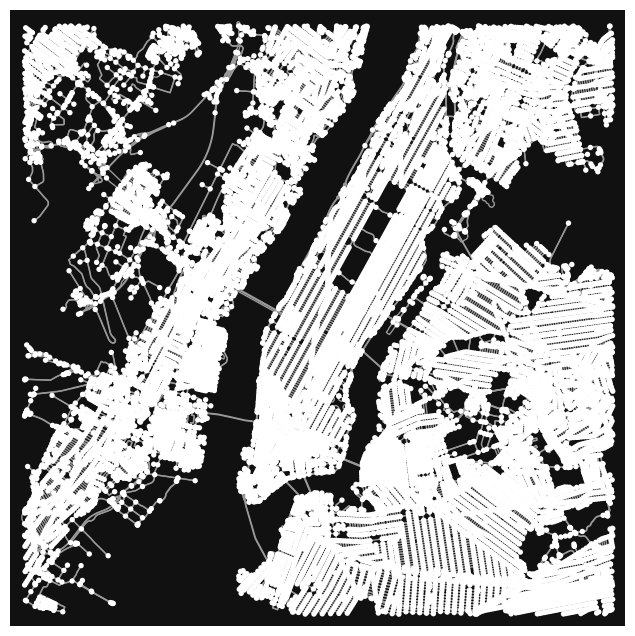

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
G = ox.graph_from_address('Times Square, Manhattan Community Board 5, Manhattan, Condado de Nueva York, Nueva York, 10036, Estados Unidos de América', dist=10000, network_type='drive')
ox.plot_graph(G)

In [ ]:
buildings = ox.features_from_address('Times Square, Manhattan Community Board 5, Manhattan, Condado de Nueva York, Nueva York, 10036, Estados Unidos de América', tags = {'building': True}, dist=100)
print(buildings)

                                                                  geometry  \
element_type osmid                                                           
way          86121620    POLYGON ((-73.98557 40.75560, -73.98536 40.755...   
             137716320   POLYGON ((-73.98503 40.75840, -73.98534 40.757...   
             157835453   POLYGON ((-73.98708 40.75788, -73.98705 40.757...   
             163474780   POLYGON ((-73.98573 40.75815, -73.98568 40.758...   
             163629929   POLYGON ((-73.98533 40.75696, -73.98573 40.757...   
             258646143   POLYGON ((-73.98638 40.75644, -73.98629 40.756...   
             258646144   POLYGON ((-73.98620 40.75690, -73.98626 40.756...   
             266034080   POLYGON ((-73.98677 40.75656, -73.98680 40.756...   
             266149334   POLYGON ((-73.98717 40.75794, -73.98718 40.757...   
             266149338   POLYGON ((-73.98693 40.75751, -73.98688 40.757...   
             266149373   POLYGON ((-73.98715 40.75720, -73.98712

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


In [ ]:
import random
id = random.choice(list(G.nodes))
#id = 103098680 # ORIGEN
#id = 42498881 # DESTINO 1
#id = 2298803501  # DESTINO 2
#id = 42499712  # DESTINO 3
#id = 42826843  # DESTINO 4
#id = 103238167  # DESTINO 5
print('Nodo de origen: ' + str(G.nodes[id]))
print('Nodos sucesores')
for node in G.successors(id):
    print(node, G.nodes[node])

Nodo de origen: {'y': 40.7008249, 'x': -73.8942408, 'street_count': 3}
Nodos sucesores
1413812673 {'y': 40.7007848, 'x': -73.8945531, 'highway': 'traffic_signals', 'street_count': 3}
7717125068 {'y': 40.7008652, 'x': -73.893822, 'highway': 'traffic_signals', 'street_count': 3}
42844452 {'y': 40.7005053, 'x': -73.8942018, 'street_count': 3}


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# PAREJAS DE NODOS

In [ ]:
# PAREJA 1:
"""
orig_node = 103098680
dest_node = 42498881
"""
# PAREJA 2:
"""
orig_node = 103098680
dest_node = 2298803501
"""
# PAREJA 3:
"""
orig_node = 103098680
dest_node = 42499712
"""
# PAREJA 4:
"""
orig_node = 103098680
dest_node = 42826843
"""
# PAREJA 5:
orig_node = 103098680
dest_node = 103238167


# BFS

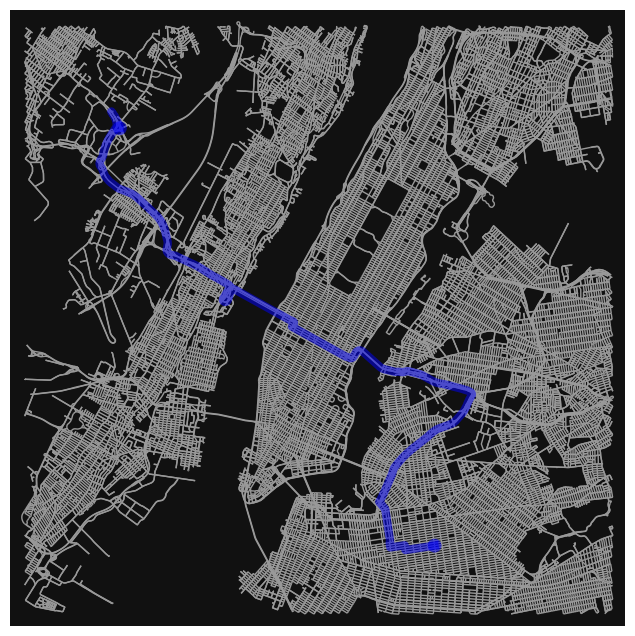

Distancia recorrida por BFS: 28144.965000000007 metros


<ipython-input-8-a99c550301df>:6: UserWarning: The `get_route_edge_attributes` function has been deprecated and will be removed in a future release. Use the `route_to_gdf` function instead.
  route_length = sum(ox.utils_graph.get_route_edge_attributes(graph, path, 'length'))


In [ ]:
def bfs_path(graph, orig_node, dest_node):
    path = nx.shortest_path(graph, source=orig_node, target=dest_node)
    route = ox.plot_graph_route(graph, path, route_color='b', route_linewidth=6, node_size=0)

    # Calcular la longitud de la ruta
    route_length = sum(ox.utils_graph.get_route_edge_attributes(graph, path, 'length'))

    print(f'Distancia recorrida por BFS: {route_length} metros')

    plt.show()

bfs_route = bfs_path(G, orig_node,dest_node)

# DFS

<ipython-input-9-503e9082b12b>:21: UserWarning: The `get_route_edge_attributes` function has been deprecated and will be removed in a future release. Use the `route_to_gdf` function instead.
  route_length = sum(ox.utils_graph.get_route_edge_attributes(G, dfs_route, 'length'))


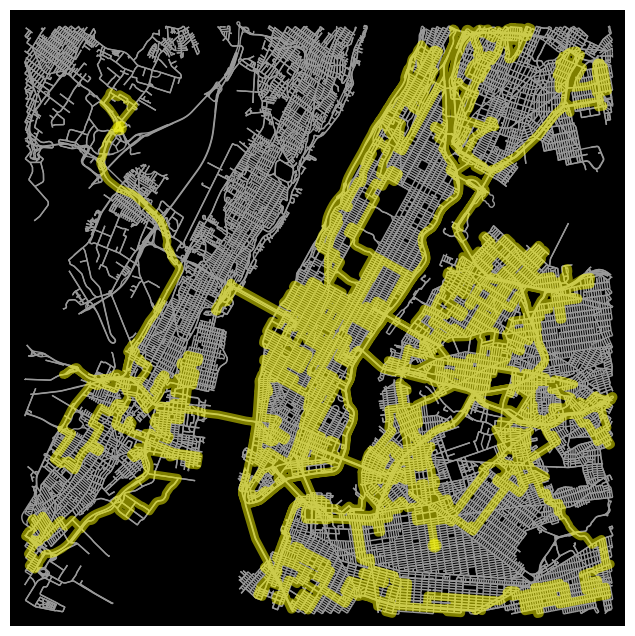

Distancia recorrida por DFS: 698129.6239999989 metros


In [ ]:
def dfs_path(graph, start, goal):
    stack = [(start, [start])]
    visited = set()

    while stack:
        (node, path) = stack.pop()
        if node not in visited:
            visited.add(node)

            for next_node in graph.neighbors(node):
                if next_node == goal:
                    return path + [next_node]
                elif next_node not in visited:
                    stack.append((next_node, path + [next_node]))


# Encontrar el camino utilizando DFS
dfs_route = dfs_path(G, orig_node, dest_node)

# Calcular la longitud de la ruta
route_length = sum(ox.utils_graph.get_route_edge_attributes(G, dfs_route, 'length'))

# Dibujar el grafo y resaltar el camino encontrado por DFS con color amarillo
ox.plot_graph_route(G, dfs_route, route_color='yellow', route_linewidth=6, node_size=0, bgcolor='k')
plt.show()

print(f'Distancia recorrida por DFS: {route_length} metros')

# UCS

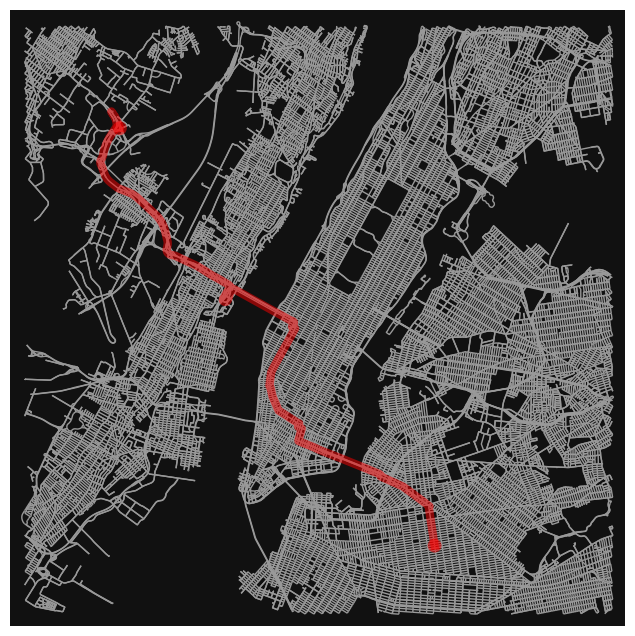

Distancia recorrida por UCS: 23979.372999999996 metros


<ipython-input-10-ca0b27bf25c8>:6: UserWarning: The `get_route_edge_attributes` function has been deprecated and will be removed in a future release. Use the `route_to_gdf` function instead.
  route_length = sum(ox.utils_graph.get_route_edge_attributes(graph, path, 'length'))


In [ ]:
def ucs_path(graph, orig_node, dest_node):
    path = nx.shortest_path(graph, source=orig_node, target=dest_node, weight='length')
    route = ox.plot_graph_route(graph, path, route_color='r', route_linewidth=6, node_size=0)

    # Calcular la longitud de la ruta
    route_length = sum(ox.utils_graph.get_route_edge_attributes(graph, path, 'length'))

    print(f'Distancia recorrida por UCS: {route_length} metros')

    plt.show()

ucs_route = ucs_path(G, orig_node,dest_node)

# A*

<ipython-input-11-59261c3d0cca>:29: UserWarning: The `get_route_edge_attributes` function has been deprecated and will be removed in a future release. Use the `route_to_gdf` function instead.
  route_length = sum(ox.utils_graph.get_route_edge_attributes(G, a_star_route, 'length'))


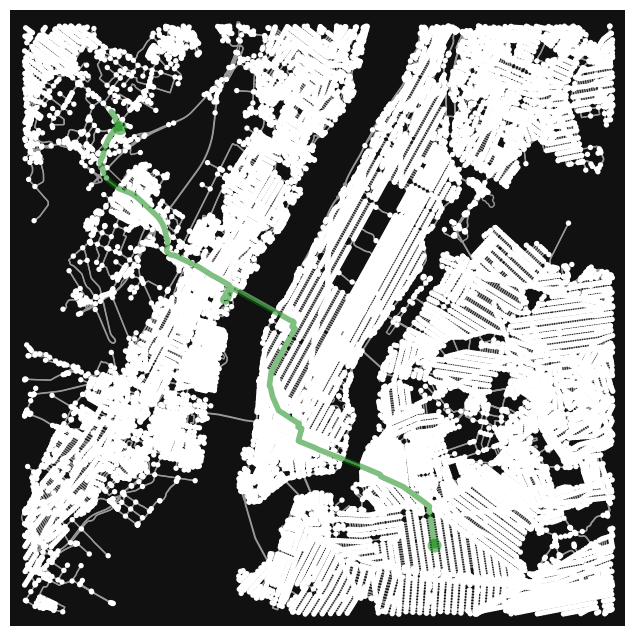

Distancia recorrida por A*: 23979.372999999996 metros


In [ ]:
def a_star_path(graph, start, goal):
    a_star_route = nx.astar_path(graph, start, goal, weight='length')
    return a_star_route

# PAREJA 1:
orig_node_a_star = 103098680
dest_node_a_star = 42498881

# PAREJA 2:
#orig_node_a_star = 103098680
#dest_node_a_star =  2298803501

# PAREJA 3:
#orig_node_a_star = 103098680
#dest_node_a_star = 42499712

# PAREJA 4:
#orig_node_a_star = 103098680
#dest_node_a_star = 42826843

# PAREJA 5:
#orig_node_a_star = 103098680
#dest_node_a_star = 103238167

# Calcular ruta con A*
a_star_route = a_star_path(G, orig_node_a_star, dest_node_a_star)

# Calcular la longitud de la ruta
route_length = sum(ox.utils_graph.get_route_edge_attributes(G, a_star_route, 'length'))

# Plotear el grafo con la ruta y mostrar la distancia
fig, ax = ox.plot_graph_route(G, a_star_route, route_color='g')
print(f'Distancia recorrida por A*: {route_length} metros')

# IDA*

In [ ]:
import geopy.distance

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


<ipython-input-13-e32d42c15dd7>:78: UserWarning: The `get_route_edge_attributes` function has been deprecated and will be removed in a future release. Use the `route_to_gdf` function instead.
  route_length = sum(ox.utils_graph.get_route_edge_attributes(G, path, 'length'))


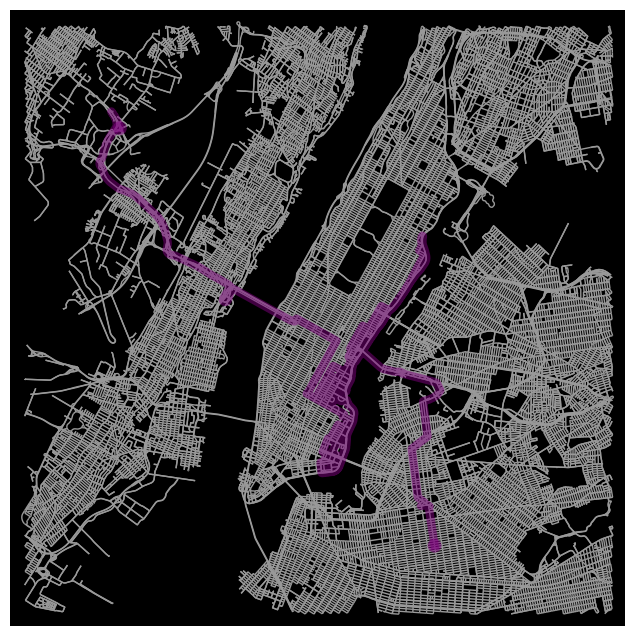

Distancia recorrida por IDA*: 63117.787000000026 metros


In [ ]:
# PAREJA 1:
orig_node = 103098680
dest_node = 42498881

# PAREJA 2:
"""
orig_node = 103098680
dest_node = 7717125068 # nuevo nodo destino
"""
# PAREJA 3:
"""
orig_node = 103098680
dest_node = 42499712
"""
# PAREJA 4:
"""
orig_node = 103098680
dest_node = 42826843
"""
# PAREJA 5:
"""
orig_node = 103098680
dest_node = 103238167
"""



def euclidean_dist(graph, node1, node2):
    coord1 = (graph.nodes[node1]['y'], graph.nodes[node1]['x'])
    coord2 = (graph.nodes[node2]['y'], graph.nodes[node2]['x'])
    return geopy.distance.distance(coord1, coord2).meters

def ida_star(graph, start_node, goal_node, heuristic_func, max_cost=float('inf')):
    def search(node, path, cost, f_cost):
        nonlocal found, min_cost
        h = heuristic_func(graph, node, goal_node)
        f_cost = cost + h

        if f_cost > max_cost:
            return f_cost

        if node == goal_node:
            found = True
            min_cost = cost  # Actualizar la distancia total aquí
            return cost

        successors = graph.successors(node)
        successors = sorted(successors, key=lambda x: heuristic_func(graph, x, goal_node))

        for successor in successors:
            if successor not in path:
                path.append(successor)
                new_cost = graph.get_edge_data(node, successor).get('travel_time', 1)
                result = search(successor, path, cost + new_cost, f_cost)
                if found:
                    return result
                path.pop()

        return min_cost

    found = False
    min_cost = float('inf')
    path = [start_node]

    while not found:
        cost = search(start_node, path, 0, 0)
        if found:
            break
        if cost >= max_cost:
            break

    return path, min_cost

# Aplicar IDA* y obtener la ruta
path, _ = ida_star(G, orig_node, dest_node, euclidean_dist)

# Calcular la longitud de la ruta
route_length = sum(ox.utils_graph.get_route_edge_attributes(G, path, 'length'))

# Plotear el grafo con la ruta y mostrar la distancia
fig, ax = ox.plot_graph_route(G, path, route_linewidth=6, node_size=0, bgcolor='k', route_color='purple')
print(f'Distancia recorrida por IDA*: {route_length} metros')



# Walk VS Drive

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Nodo de origen: {'y': 40.721946, 'x': -73.942004, 'highway': 'stop', 'street_count': 4}
Nodo de destino: {'y': 40.727768, 'x': -73.869243, 'street_count': 3}


<ipython-input-32-74694bed5e2b>:15: UserWarning: The `get_route_edge_attributes` function has been deprecated and will be removed in a future release. Use the `route_to_gdf` function instead.
  return sum(ox.utils_graph.get_route_edge_attributes(graph, path, 'length'))


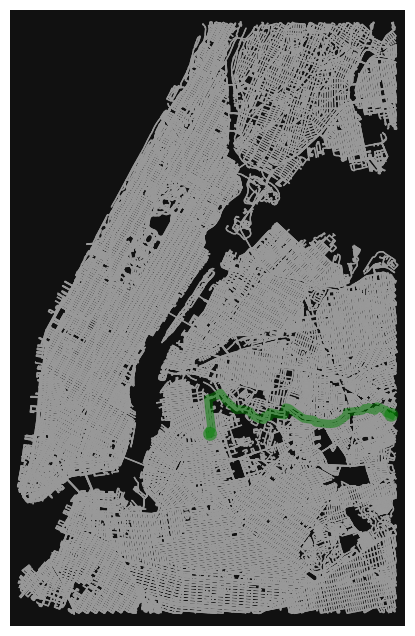

Distancia recorrida caminando: 9229.785999999998 metros (verde)


<ipython-input-32-74694bed5e2b>:15: UserWarning: The `get_route_edge_attributes` function has been deprecated and will be removed in a future release. Use the `route_to_gdf` function instead.
  return sum(ox.utils_graph.get_route_edge_attributes(graph, path, 'length'))


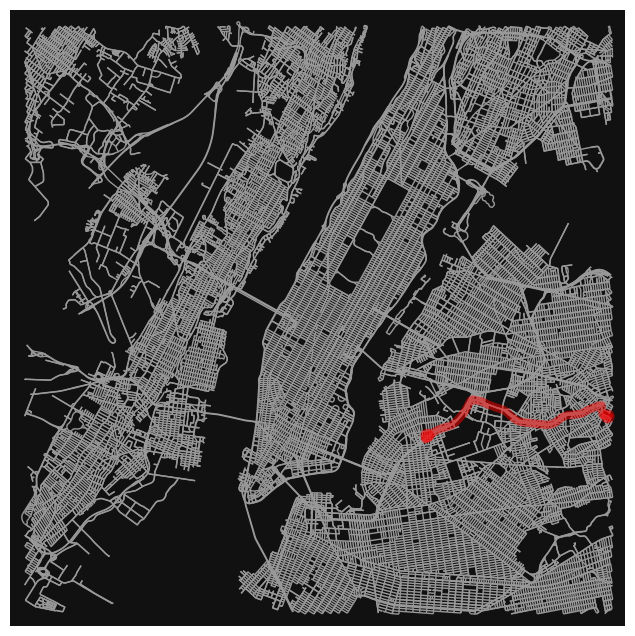

Distancia recorrida en coche: 7572.6280000000015 metros (rojo)
¡Es mejor conducir!


In [ ]:
def generate_nodes(graph_walk, graph_drive):
    common_nodes = set(graph_walk.nodes) & set(graph_drive.nodes)
    if not common_nodes:
        raise ValueError("No hay nodos comunes entre los dos grafos.")

    origin_node = random.choice(list(common_nodes))
    destination_node = random.choice(list(common_nodes - {origin_node}))
    return origin_node, destination_node

def bfs_path(graph, orig_node, dest_node):
    path = nx.shortest_path(graph, source=orig_node, target=dest_node)
    return path

def calculate_path_length(graph, path):
    return sum(ox.utils_graph.get_route_edge_attributes(graph, path, 'length'))

def walk_path(graph, orig_node, dest_node):
    path = bfs_path(graph, orig_node, dest_node)
    route_length = calculate_path_length(graph, path)
    route = ox.plot_graph_route(graph, path, route_color='g', route_linewidth=6, node_size=0)
    print(f'Distancia recorrida caminando: {route_length} metros (verde)')
    return route_length

def drive_path(graph, orig_node, dest_node):
    path = bfs_path(graph, orig_node, dest_node)
    route_length = calculate_path_length(graph, path)
    route = ox.plot_graph_route(graph, path, route_color='r', route_linewidth=6, node_size=0)
    print(f'Distancia recorrida en coche: {route_length} metros (rojo)')
    return route_length

def find_path(graph_walk, graph_drive, orig_node, dest_node):
    walk_length = walk_path(graph_walk, orig_node, dest_node)
    drive_length = drive_path(graph_drive, orig_node, dest_node)

    if walk_length < drive_length:
        print("¡Es mejor caminar!")
    else:
        print("¡Es mejor conducir!")

# Crear los grafos
G_walk = ox.graph_from_address('Times Square, Manhattan Community Board 5, Manhattan, Condado de Nueva York, Nueva York, 10036, Estados Unidos de América', dist=10000, network_type='walk')
G_drive = ox.graph_from_address('Times Square, Manhattan Community Board 5, Manhattan, Condado de Nueva York, Nueva York, 10036, Estados Unidos de América', dist=10000, network_type='drive')

# Generar nodos y seleccionar parejas de nodos presentes en ambos grafos
origin_node, destination_node = generate_nodes(G_walk, G_drive)

# Mostrar información sobre los nodos
print('Nodo de origen: ' + str(G_walk.nodes[origin_node]))
print('Nodo de destino: ' + str(G_walk.nodes[destination_node]))

# Calcular y mostrar las rutas
find_path(G_walk, G_drive, origin_node, destination_node)
plt.show()